In [28]:
import matplotlib.pyplot as plt
import numpy as np
import math



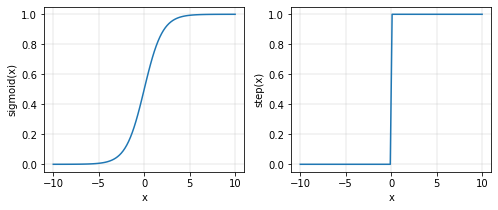

In [29]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
step = lambda x: np.where(x >= 0, 1, 0)

x = np.linspace(-10, 10, 100)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax1.plot(x, sigmoid(x))
ax1.set_xlabel("x")
ax1.set_ylabel("sigmoid(x)")
ax1.grid(linewidth=0.3)

ax2.plot(x, step(x))
ax2.set_xlabel("x")
ax2.set_ylabel("step(x)")
ax2.grid(linewidth=0.3)

plt.tight_layout(pad=1.0)

#plt.savefig("sigmoid_step.png")
plt.show()

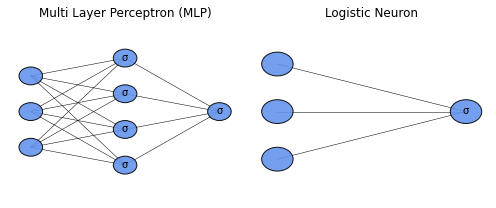

In [30]:
# source: https://gist.github.com/craffel/2d727968c3aaebd10359

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, activation: str = ""):
    '''
    Draw a neural network cartoon using matplotilb.

    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])

    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            x = n * h_spacing + left
            y = layer_top - m * v_spacing

            circle = plt.Circle((x, y), v_spacing / 4.,
                                color='cornflowerblue', ec='k', zorder=4, alpha=0.9)

            if n > 0:
                ax.annotate(activation, xy=(x, y - 0.01), fontsize=10, ha="center", zorder=5)
            ax.add_artist(circle)

        # if n == 0:
        #     _y = layer_top - (m+1) * v_spacing
        #     ax.annotate("x", xy=(x, _y), fontsize=10, ha="center", zorder=5, weight="bold")
        #     ax.annotate("W", xy=(x + h_spacing / 2, _y), fontsize=10, ha="center", zorder=5, weight="bold")

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k', linewidth=0.5)
                ax.add_artist(line)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax1.axis('off')
draw_neural_net(ax1, .1, .9, .1, .9, [3, 4, 1], activation="\u03C3")
ax1.title.set_text('Multi Layer Perceptron (MLP)')

ax2.axis('off')
draw_neural_net(ax2, .1, .9, .1, .9, [3, 1], activation="\u03C3")
ax2.title.set_text('Logistic Neuron')

plt.tight_layout()
plt.savefig("mlp_logneuron.png")
plt.show()

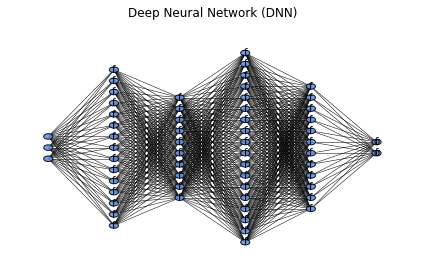

In [31]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes, activation: str = "f", output_activation: str = ""):
    '''
    Draw a neural network cartoon using matplotilb.

    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])

    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            x = n * h_spacing + left
            y = layer_top - m * v_spacing

            circle = plt.Circle((x, y), v_spacing / 4.,
                                color='cornflowerblue', ec='k', zorder=4, alpha=0.9)

            if n > 0:
                ax.annotate(activation, xy=(x, y - 0.01), fontsize=10, ha="center", zorder=5)

            if n == len(layer_sizes) - 1:
                ax.annotate(output_activation, xy=(x, y - 0.01), fontsize=10, ha="center", zorder=5)
            ax.add_artist(circle)

        # if n == 0:
        #     _y = layer_top - (m+1) * v_spacing
        #     ax.annotate("x", xy=(x, _y), fontsize=10, ha="center", zorder=5, weight="bold")
        #     ax.annotate("W", xy=(x + h_spacing / 2, _y), fontsize=10, ha="center", zorder=5, weight="bold")

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k', linewidth=0.5)
                ax.add_artist(line)


fig, (ax1) = plt.subplots(nrows=1, ncols=1)
ax1.axis('off')
draw_neural_net(ax1, .1, .9, .1, .9, [3, 15, 10, 18, 12, 2], output_activation="\u03C3")
ax1.title.set_text('Deep Neural Network (DNN)')

plt.tight_layout()
plt.savefig("dnn.png")
plt.show()

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from entmax import sparsemax as entmax_sparsemax


# naive algorithm
def sparsemax(z):
    z_sorted = z[np.argsort(-z)]
    print(f"z_sorted: {z_sorted}")

    z_cumsum = np.cumsum(z_sorted)
    print(f"z_cumsum: {z_cumsum}")

    k_range = (np.arange(len(z)) + 1)
    print(f"k_range: {k_range}")

    k_array = (1 + k_range * z_sorted)
    print(f"k_array: {k_array}")

    k_s = k_array > z_cumsum
    print(f"k_s: {k_s}")

    k_z = np.max(k_range * k_s)
    print(f"k_z: {k_z}")

    tau_z = (z_sorted[:k_z].sum() - 1) / k_z
    print(f"z: {z}")
    print(f"tau_z: {tau_z}")

    # step 4
    out = np.maximum(z - tau_z, 0)

    return out


#x = np.random.random(size=(10, ))
#x = np.random.uniform(size=(10, ))
#x = np.array([-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0])
x = np.array([-1.0, -0.5, 0.0, 0.5, 1.0])

s = sparsemax(x)
st = entmax_sparsemax(torch.from_numpy(x))

print(f"naive sparsemax : {s}")
print(f"entmax sparsemax: {st.numpy()}")

z_sorted: [ 1.   0.5  0.  -0.5 -1. ]
z_cumsum: [1.  1.5 1.5 1.  0. ]
k_range: [1 2 3 4 5]
k_array: [ 2.  2.  1. -1. -4.]
k_s: [ True  True False False False]
k_z: 2
z: [-1.  -0.5  0.   0.5  1. ]
tau_z: 0.25
naive sparsemax : [0.   0.   0.   0.25 0.75]
entmax sparsemax: [0.   0.   0.   0.25 0.75]


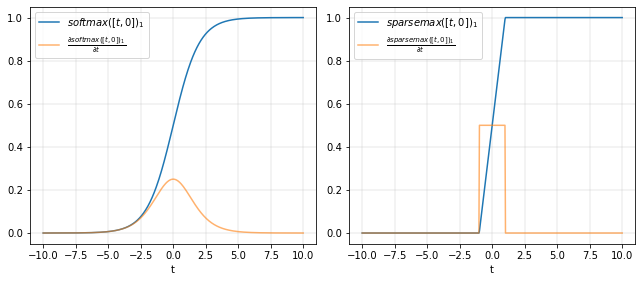

In [33]:
import matplotlib.pyplot as plt
import torch
from entmax import sparsemax as entmax_sparsemax


def softmax(z):
    z = torch.stack([z, z], dim=1)
    z[:, 0] = 0.0

    o = torch.softmax(z, dim=-1)

    return o[:, 1]


def sparsemax(z):
    z = torch.stack([z, z], dim=1)
    z[:, 0] = 0.0

    o = entmax_sparsemax(z)

    return o[:, 1]


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

z = torch.linspace(-10, 10, 500, requires_grad=True)
sm = softmax(z)
sm.sum().backward()

ax1.plot(z.detach().numpy(), sm.detach().numpy(), label=r"$softmax([t, 0])_{1}$")
ax1.plot(z.detach().numpy(), z.grad, alpha=0.6, label=r"$\frac{ \partial softmax([t, 0])_{1}} {\partial t}$")
ax1.set_xlabel("t")
ax1.legend()
ax1.grid(linewidth=0.3)

z = torch.linspace(-10, 10, 500, requires_grad=True)
sp = sparsemax(z)
sp.sum().backward()

ax2.plot(z.detach().numpy(), sp.detach().numpy(), label=r"$sparsemax([t, 0])_{1}$")
ax2.plot(z.detach().numpy(), z.grad, alpha=0.6, label=r"$\frac{ \partial sparsemax([t, 0])_{1}} {\partial t}$")
ax2.set_xlabel("t")
ax2.legend()
ax2.grid(linewidth=0.3)

plt.tight_layout(pad=1.0)

plt.savefig("softmax_sparsemax.png")
plt.show()


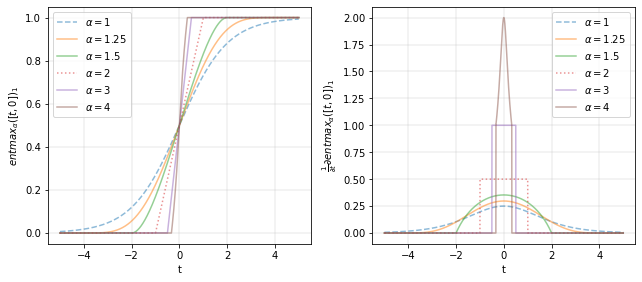

In [34]:
import matplotlib.pyplot as plt
import torch
from entmax import sparsemax as entmax_sparsemax
from entmax import entmax15 as entmax_entmax15
from entmax import entmax_bisect


def softmax(z):
    z = torch.stack([z, z], dim=1)
    z[:, 0] = 0.0

    o = torch.softmax(z, dim=-1)

    return o[:, 1]


def sparsemax(z):
    z = torch.stack([z, z], dim=1)
    z[:, 0] = 0.0

    o = entmax_sparsemax(z)

    return o[:, 1]


def alpha_entmax(z, alpha):
    z = torch.stack([z, z], dim=1)
    z[:, 0] = 0.0

    o = entmax_bisect(z, alpha)

    return o[:, 1]


def entmax15(z):
    z = torch.stack([z, z], dim=1)
    z[:, 0] = 0.0

    o = entmax_entmax15(z)

    return o[:, 1]


z = torch.linspace(-5, 5, 10000, requires_grad=True)

sm = softmax(z)
sm.sum().backward()
sm_grad = z.grad.clone()
z.grad = None

sp = sparsemax(z)
sp.sum().backward()
sp_grad = z.grad.clone()
z.grad = None

em15 = entmax15(z)
em15.sum().backward()
em15_grad = z.grad.clone()
z.grad = None

em125 = alpha_entmax(z, 1.25)
em125.sum().backward()
em125_grad = z.grad.clone()
z.grad = None

em4 = alpha_entmax(z, 4.0)
em4.sum().backward()
em4_grad = z.grad.clone()
z.grad = None

em3 = alpha_entmax(z, 3.0)
em3.sum().backward()
em3_grad = z.grad.clone()
z.grad = None

z = z.detach().numpy()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

ax1.plot(z, sm.detach(), "--", alpha=0.5, label=r"$\alpha=1$")
ax1.plot(z, em125.detach(), alpha=0.5, label=r"$\alpha=1.25$")
ax1.plot(z, em15.detach(), alpha=0.5, label=r"$\alpha=1.5$")
ax1.plot(z, sp.detach(), ":", alpha=0.5, label=r"$\alpha=2$")
ax1.plot(z, em3.detach(), alpha=0.5, label=r"$\alpha=3$")
ax1.plot(z, em4.detach(), alpha=0.5, label=r"$\alpha=4$")
ax1.set_ylabel(r"$entmax_{\alpha}([t,0])_1$")
ax1.set_xlabel("t")
#ax1.set_title(r"$entmax_{\alpha}([t,0])_1$ evaluated")
ax1.legend()
ax1.grid(linewidth=0.3)

ax2.plot(z, sm_grad, "--", alpha=0.5, label=r"$\alpha=1$")
ax2.plot(z, em125_grad, alpha=0.5, label=r"$\alpha=1.25$")
ax2.plot(z, em15_grad, alpha=0.5, label=r"$\alpha=1.5$")
ax2.plot(z, sp_grad, ":", alpha=0.5, label=r"$\alpha=2$")
ax2.plot(z, em3_grad, alpha=0.5, label=r"$\alpha=3$")
ax2.plot(z, em4_grad, alpha=0.5, label=r"$\alpha=4$")
ax2.set_xlabel("t")
ax2.set_ylabel(r"$\frac{1}{\partial t} \partial entmax_{\alpha}([t,0])_1$")
#ax2.set_title(r"gradient of $entmax_{\alpha}([t,0])_1$ w.r.t $t$")
ax2.legend()
ax2.grid(linewidth=0.3)

plt.tight_layout(pad=1.0)

plt.savefig("entmax.png")
plt.show()


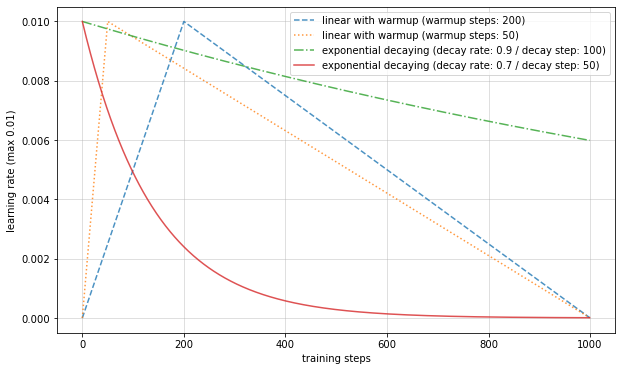

In [35]:
import matplotlib.pyplot as plt

import numpy as np


def linear_with_warmup(current_step, num_warmup_steps: int = 10, num_training_steps: int = 100):
    o = []
    for s in current_step:
        if s < num_warmup_steps:
            o.append(float(s) / float(max(1, num_warmup_steps)))
        else:
            o.append(max(
                0.0, float(num_training_steps - s) / float(max(1, num_training_steps - num_warmup_steps))
            ))

    return np.array(o)


def exponential_decaying(current_step, decay_rate: float = 0.95, decay_step: int = 800):
    return decay_rate ** (current_step / decay_step)


num_warmup_steps = 200
decay_rate = 0.8
decay_step = 50

num_training_steps = 1000
lr = 0.01

x = np.arange(num_training_steps)

y_linear = lr * linear_with_warmup(x, num_warmup_steps, len(x))
y_decay = lr * exponential_decaying(x, decay_rate, decay_step)

plt.figure(figsize=(10, 6))
plt.plot(x, lr * linear_with_warmup(x, 200, len(x)), linestyle="--", alpha=0.8, label=f"linear with warmup (warmup steps: {200})")
plt.plot(x, lr * linear_with_warmup(x, 50, len(x)), ":", alpha=0.8, label=f"linear with warmup (warmup steps: {50})")
plt.plot(x, lr * exponential_decaying(x, 0.95, 100), linestyle="dashdot", alpha=0.8,
         label=f"exponential decaying (decay rate: {0.9} / decay step: {100})")
plt.plot(x, lr * exponential_decaying(x, 0.7, 50), alpha=0.8, label=f"exponential decaying (decay rate: {0.7} / decay step: {50})")

plt.xlabel("training steps")
plt.ylabel(f"learning rate (max {lr})")
plt.grid(alpha=0.5)
plt.legend()

plt.savefig("scheduler_linear_exponential.png")
plt.show()

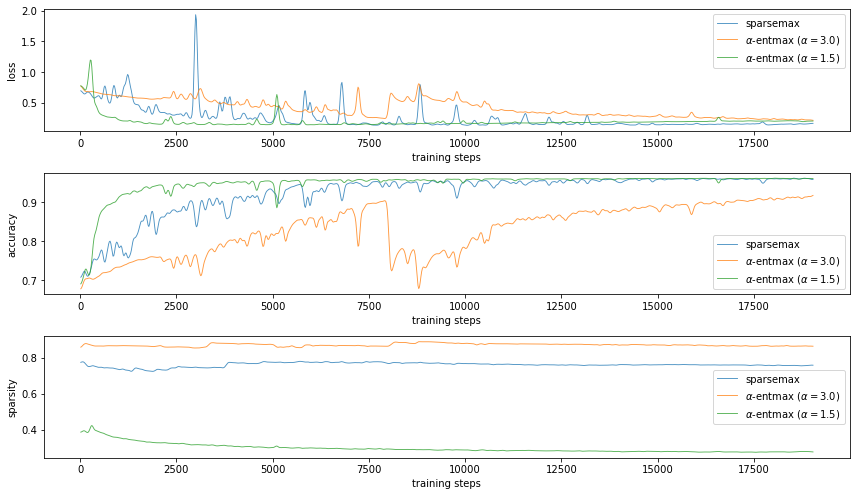

In [34]:
import mlflow
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline
from scipy.ndimage.filters import gaussian_filter1d


tracking_uri = "http://localhost:5000"
mlflow.set_tracking_uri(tracking_uri)

experiment_name = "covtype_tn1"
exp = mlflow.get_experiment_by_name(experiment_name)

runs = mlflow.search_runs(experiment_ids=exp.experiment_id)

filter_list = ["MySparsemax", "EntmaxAlpha3.0", "Entmax15"]
label_run_names = ["sparsemax", r"$\alpha$-entmax ($\alpha=3.0$)", r"$\alpha$-entmax ($\alpha=1.5$)"]
runs["runName"] = runs["tags.mlflow.runName"]
runs = runs.query("runName==(@filter_list)")

client = mlflow.tracking.MlflowClient(tracking_uri=tracking_uri)
val_accuracy = client.get_metric_history("fb30421c0cb34cdda54a7d961a09c7ad", "val/Accuracy")

metric_names = ["val/loss", "val/Accuracy", "val/sparsity_mask"]
label_metric_names = ["loss", "accuracy", "sparsity"]
metrics = {}
truncate_steps = np.iinfo(np.int32).max
for _, row in runs.iterrows():

    _metrics = client.get_metric_history(row["run_id"], metric_names[0])

    _run_metrics = {
        "steps": np.array([m.step for m in _metrics]),
        metric_names[0]: np.array([m.value for m in _metrics])
    }

    #truncate_steps = _run_metrics["steps"].max() if truncate_steps > _run_metrics["steps"].max() else truncate_steps
    truncate_steps = len(_metrics) if truncate_steps > len(_metrics) else truncate_steps

    for name in metric_names[1:]:
        _metrics = client.get_metric_history(row["run_id"], name)

        _run_metrics[name] = np.array([m.value for m in _metrics])

    metrics[row["runName"]] = _run_metrics

fig, axes = plt.subplots(nrows=len(metric_names), ncols=1, figsize=(12, 7))

for exp_name, (run_name, run_metrics) in zip(label_run_names, metrics.items()):
    for ax, metric_name, label_metric_name in zip(axes, metric_names, label_metric_names):
        x = run_metrics["steps"][:truncate_steps]
        y = run_metrics[metric_name][:truncate_steps]
        ysmoothed = gaussian_filter1d(y, sigma=2)

        ax.plot(x, ysmoothed, linewidth=0.9, alpha=0.8, label=exp_name)
        ax.set_xlabel("training steps")
        ax.set_ylabel(label_metric_name)
        ax.legend()

plt.tight_layout()

plt.savefig("covtype_training_behavior.png")
plt.show()

2021.03.1


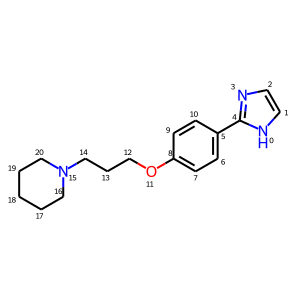

In [13]:

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
import rdkit
print(rdkit.__version__)


herg = "[nH]1ccnc1-c2ccc(cc2)OCCCN3CCCCC3" # A5
hergophore = "CCOc1ccccc1" # Ethoxybenzene

mol_herg = Chem.MolFromSmiles(herg)

d2d = rdMolDraw2D.MolDraw2DSVG(300,300)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(mol_herg)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

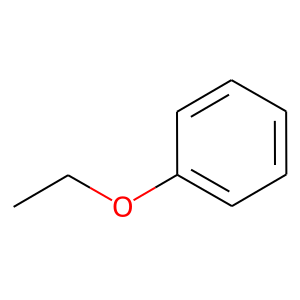

In [14]:
mol_hergophore = Chem.MolFromSmiles(hergophore)
d2d = rdMolDraw2D.MolDraw2DSVG(300,300)

d2d.DrawMolecule(mol_hergophore)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [16]:
import numpy as np

num_atoms = mol_herg.GetNumAtoms()

atom_match_count = np.zeros(num_atoms)

print(num_atoms)

21
